In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(dir(datasets))

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__getattr__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_arff_parser', '_base', '_california_housing', '_covtype', '_kddcup99', '_lfw', '_olivetti_faces', '_openml', '_rcv1', '_samples_generator', '_species_distributions', '_svmlight_format_fast', '_svmlight_format_io', '_twenty_newsgroups', 'clear_data_home', 'dump_svmlight_file', 'fetch_20newsgroups', 'fetch_20newsgroups_vectorized', 'fetch_california_housing', 'fetch_covtype', 'fetch_kddcup99', 'fetch_lfw_pairs', 'fetch_lfw_people', 'fetch_olivetti_faces', 'fetch_openml', 'fetch_rcv1', 'fetch_species_distributions', 'get_data_home', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine', 'make_biclusters', 'make_blobs', 'make_checkerboard', 'make_circles', 'make_classification', 'make_friedman1', 'make_f

In [ ]:
iris_raw=datasets.load_iris()
iris_data = pd.DataFrame(data=iris_raw.data, columns=iris_raw.feature_names)
iris_data.info()
iris_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_data['species'] = [iris_raw.target_names[i] for i in iris_raw.target]
iris_data.info()
iris_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_data["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [ ]:
#EDA
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [ ]:
iris_data.duplicated().sum()

1

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

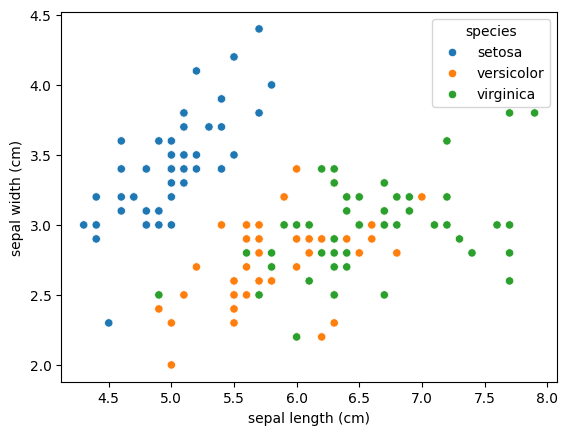

In [ ]:
sns.scatterplot(data=iris_data, x='sepal length (cm)', y='sepal width (cm)', hue='species')
#

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

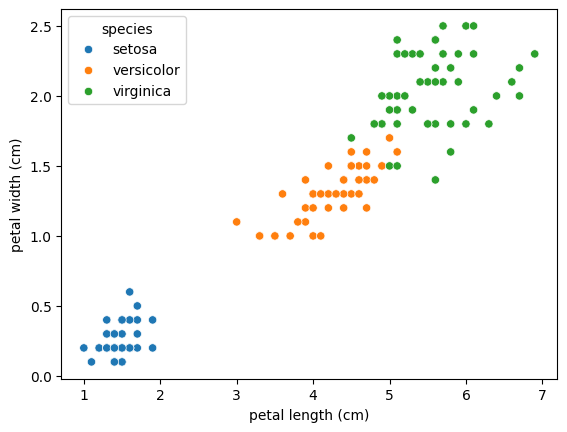

In [ ]:
sns.scatterplot(data=iris_data, x='petal length (cm)', y='petal width (cm)', hue='species')
#

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

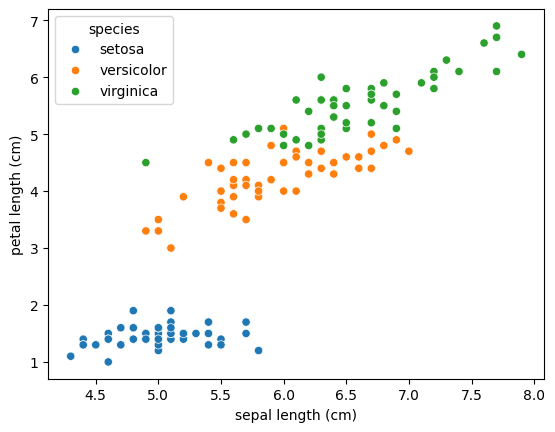

In [ ]:
sns.scatterplot(data=iris_data,x='sepal length (cm)', y='petal length (cm)', hue='species')

In [ ]:
def outlier_detector(data,column):
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR=Q1-Q3
    lower_bound=IQR-Q1*1.5
    upper_bound=IQR+Q1*1.5
    print((data[(data[column]<lower_bound)&(data[column]>upper_bound)]).count())

In [ ]:

ir=iris_data.drop("species",inplace=True,axis=1)


In [ ]:
# Assuming 'species' is your categorical column
iris_data['species'] = iris_data['species'].map({'setosa': 1, 'versicolor': 2, 'virginica': 3})

In [ ]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


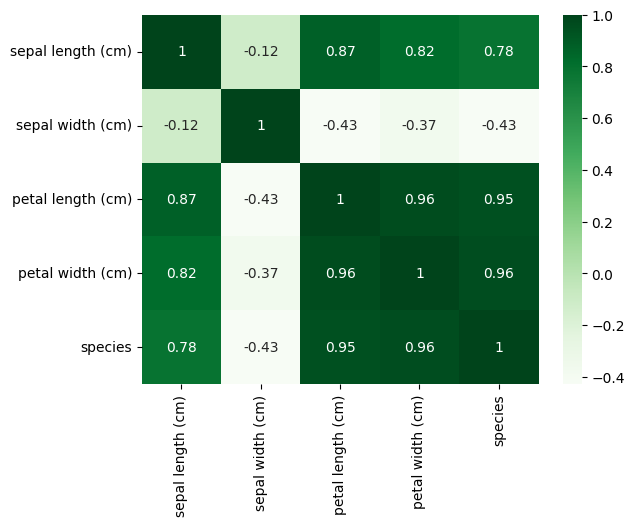

In [ ]:
sns.heatmap(iris_data.corr(),annot=True,cmap="Greens")
plt.show()

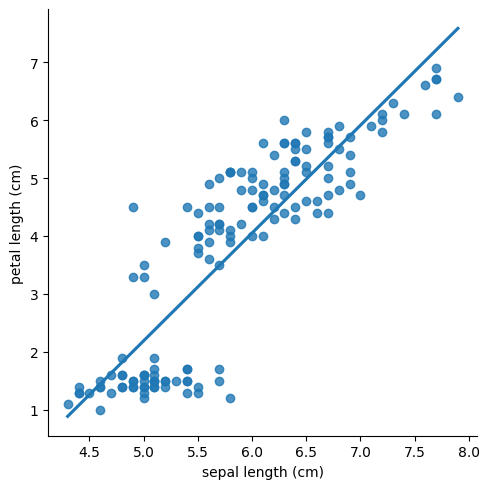

In [ ]:
sns. lmplot(x="sepal length (cm)",y="petal length (cm)",data=iris_data, fit_reg=True, ci=None)

In [ ]:
X=iris_data.drop("species",axis=1)
y=iris_data["species"]
print(X,y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns] 0         setosa
1         setosa
2     

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23)

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(120, 4) (120,) (30, 4) (30,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import accuracy_score,balanced_accuracy_score,top_k_accuracy_score,f1_score,classification_report,class_likelihood_ratios

In [ ]:
print("Training set class distribution:")
print(y_train.value_counts())
print("\nTest set class distribution:")
print(y_test.value_counts())

Training set class distribution:
species
versicolor    42
virginica     40
setosa        38
Name: count, dtype: int64

Test set class distribution:
species
setosa        12
virginica     10
versicolor     8
Name: count, dtype: int64


In [ ]:
def model_scores(y_test,y_pred):
    print(f"accuracy_score:{accuracy_score(y_test,y_pred)},\n")
    #print(f"balanced_accuracy_score:{balanced_accuracy_score(y_test,y_pred)},\n")
    #print(f"top_k_accuracy_score:{top_k_accuracy_score(y_test,y_pred)},\n")
    #print(f"f1_score:{f1_score(y_test,y_pred)}","\n")
    print(classification_report(y_test,y_pred))

In [ ]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_predDT=dtree.predict(X_test)
#y_predDT=pd.DataFrame(y_predDT)
model_scores(y_test,y_predDT)


accuracy_score:0.9666666666666667,

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
LoReg=LogisticRegression()
LoReg.fit(X_train,y_train)
lpred=LoReg.predict(X_test)
model_scores(y_test,lpred)

accuracy_score:1.0,

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      1.00      1.00         8
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
RandClass=RandomForestClassifier()
RandClass.fit(X_train,y_train)
Rpred=RandClass.predict(X_test)
model_scores(y_test,Rpred)

accuracy_score:0.9666666666666667,

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
kpred=RandClass.predict(X_test)
model_scores(y_test,kpred)

accuracy_score:0.9666666666666667,

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



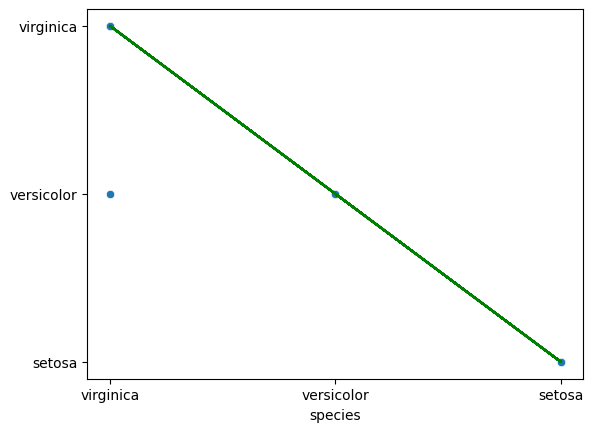

In [ ]:
sns.scatterplot(x=y_test,y=Rpred)
plt.plot(Rpred,Rpred,color="green")
plt.show()

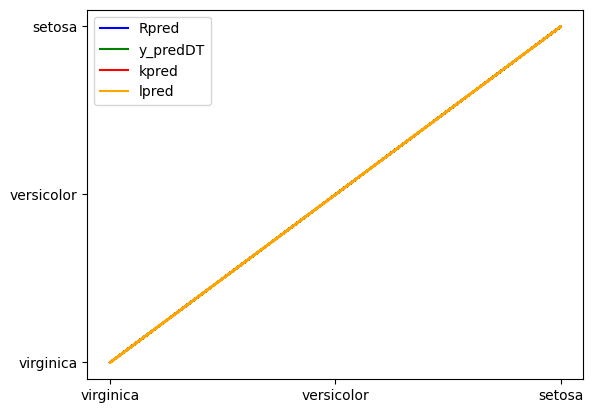

In [ ]:
plt.plot(Rpred, Rpred, color="blue", label="Rpred")
plt.plot(y_predDT, y_predDT, color="green", label="y_predDT")
plt.plot(kpred, kpred, color="red", label="kpred")
plt.plot(lpred, lpred, color="orange", label="lpred")

plt.legend()  # Display a legend to identify each line
plt.show()
